# Project 3: Clustering

## Business Understanding (10 points total).
• [10 points] Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

## Data Understanding (20 points total)
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?

• [10 points] Visualize the any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.

In [1]:
import pandas as pd
import numpy as np
import os
# import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances

# import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

In [3]:
# path = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/DataMining/Classificaiton2/"
path = 'C:/Users/Casiano/Dropbox/SMU_DataScience/MSDS_7331_Data_Mining/Project3/'
df =  pd.read_csv(path + "SCADAcombined2017_T014_PROJECT3.csv")

del df['TimeStamp']
df.dropna(inplace=True)
# df = df.reset_index()

# df['diff'] = df['wtc_ScYawPos_mean'] - df['WindDir_D1_WVT']

print("Dimensions of data frame: ", df.shape)
print(df.info())
df.head()

Dimensions of data frame:  (52451, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52451 entries, 0 to 52461
Data columns (total 2 columns):
wtc_ScYawPos_mean    52451 non-null float64
WindDir_D1_WVT       52451 non-null float64
dtypes: float64(2)
memory usage: 1.2 MB
None


wtc_ScYawPos_mean  WindDir_D1_WVT
0           350.3289           41.78
1           356.3080           38.27
2           359.3556           40.67
3           360.1000           38.86
4           358.4161           42.44

## Modeling and Evaluation (50 points total)
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results. Each option is broken down by:

• [10 Points] Train and adjust parameters

• [10 Points] Evaluate and Compare

• [10 Points] Visualize Results

• [20 Points] Summarize the Ramifications

### Option A: Cluster Analysis
• Train: Perform cluster analysis using several clustering methods (adjust parameters).

• Eval: Use internal and/or external validation measures to describe and compare the
clusterings and the clusters— how did you determine a suitable number of clusters for
each method?

• Visualize: Use tables/visualization to discuss the found results. Explain each
visualization in detail.

• Summarize: Describe your results. What findings are the most interesting and why?

### Train: Perform Custer Analysis Using Several Clustering methods and adjust parameters (10 points)

First, I want to look at wind speed vs historical power output. It will be interesting to see how different turbines are clustered together, especially if their name plate capacity is different across clusters.

## First I need to look at a graph of the two variables that I am attempting to cluster. I want to see if there are any obvious groups to adjust the number of clusters for KMeans and for adjustment of other parameters. 

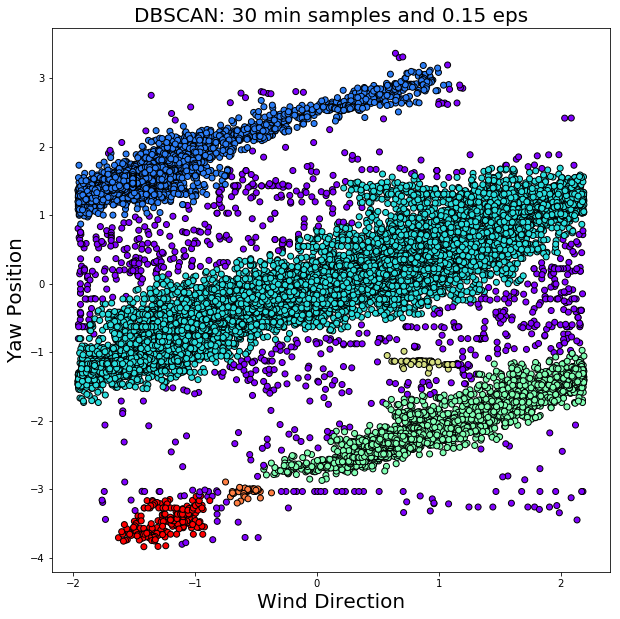

Estimated number of clusters: 6
Silhouette Score = 0.336819929778


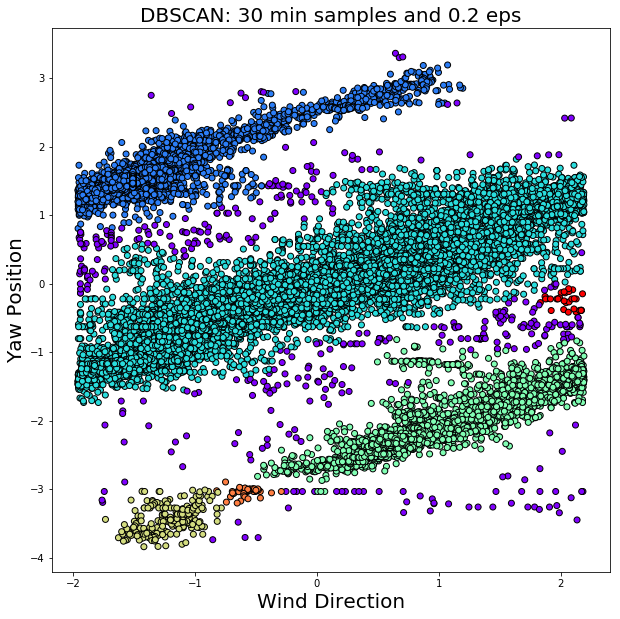

Estimated number of clusters: 6
Silhouette Score = 0.381593869227


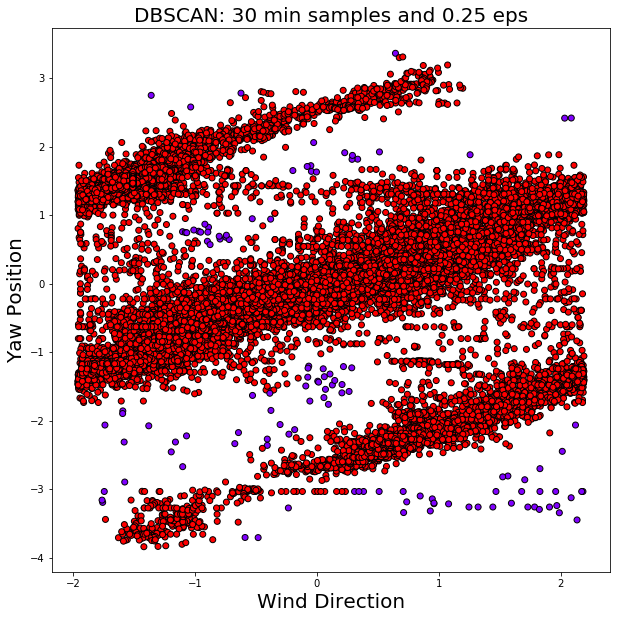

Estimated number of clusters: 1
Silhouette Score = 0.387514168233


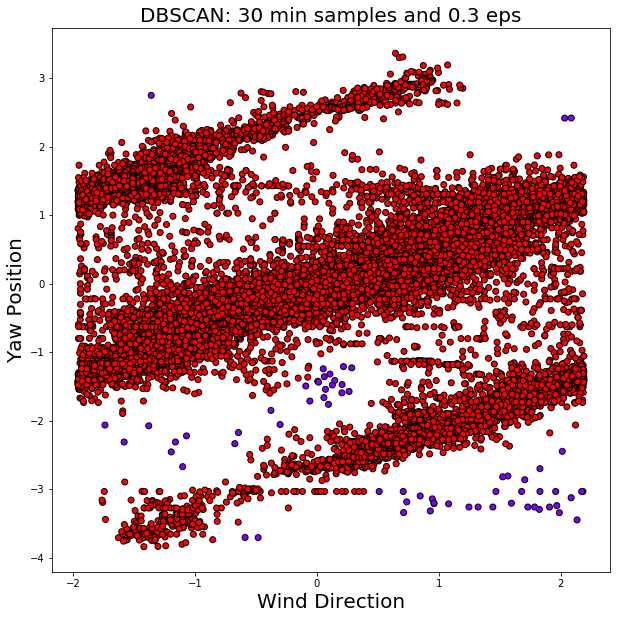

Estimated number of clusters: 1
Silhouette Score = 0.316672202773


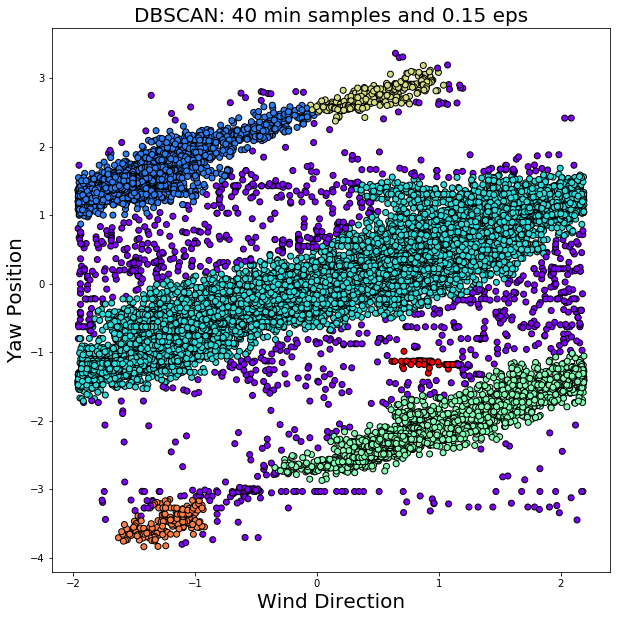

Estimated number of clusters: 6
Silhouette Score = 0.349439336623


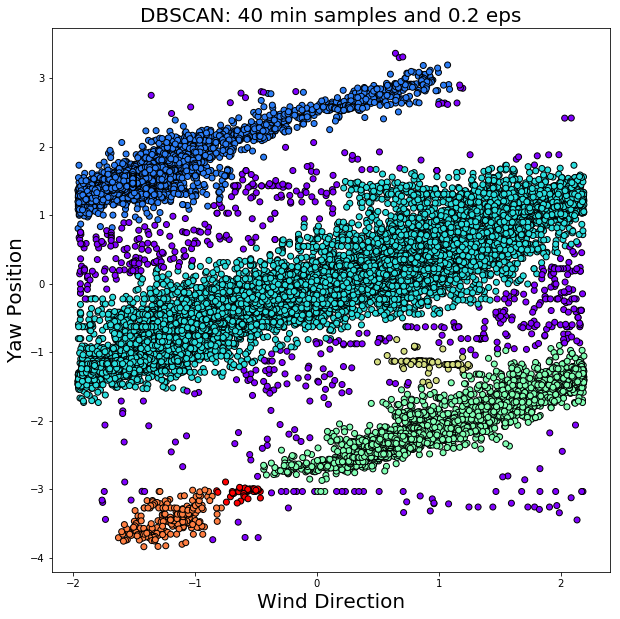

Estimated number of clusters: 6
Silhouette Score = 0.355305225474


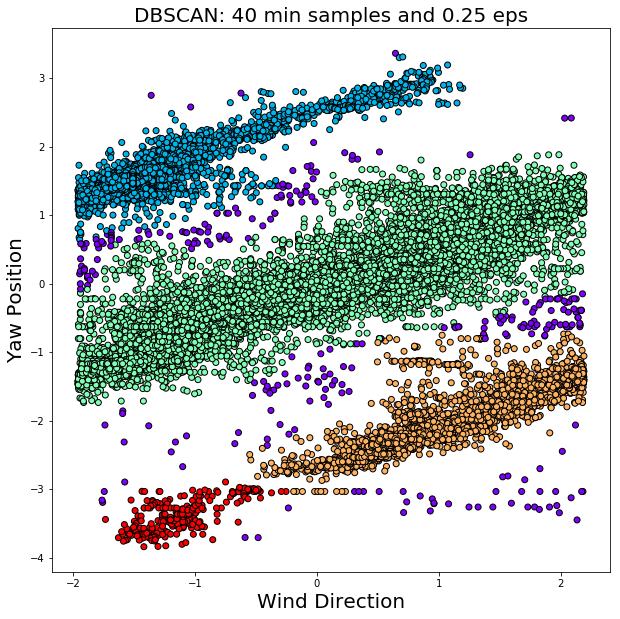

Estimated number of clusters: 4
Silhouette Score = 0.507073452045


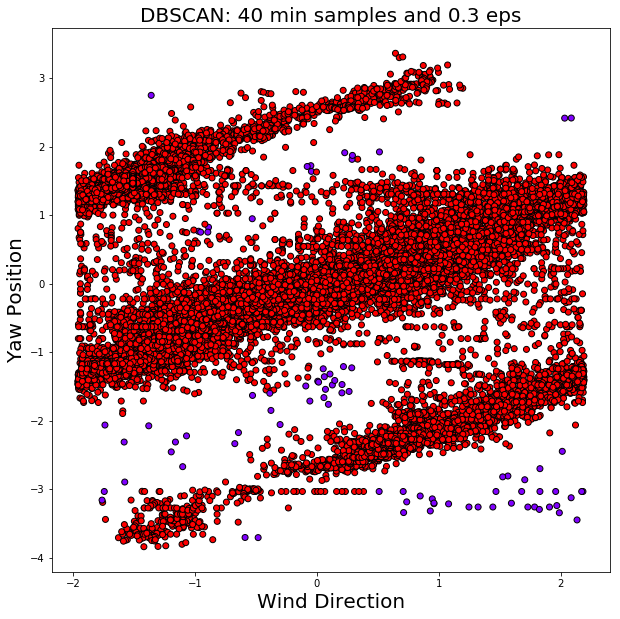

Estimated number of clusters: 1
Silhouette Score = 0.381788085389


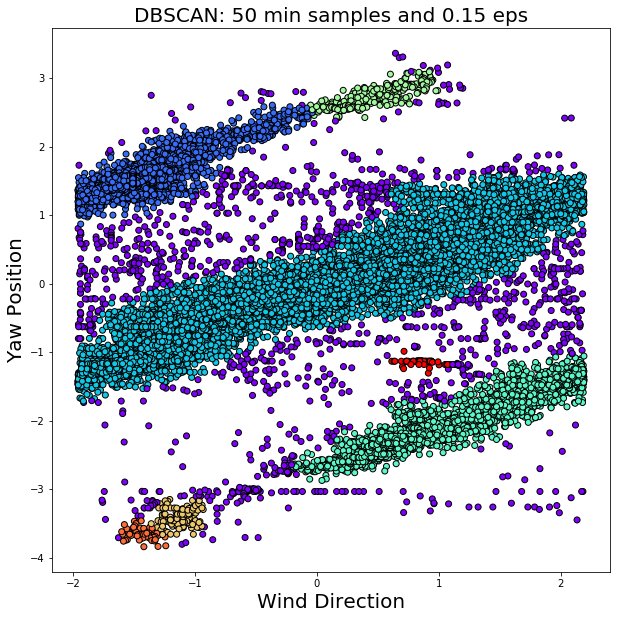

Estimated number of clusters: 7
Silhouette Score = 0.332787797367


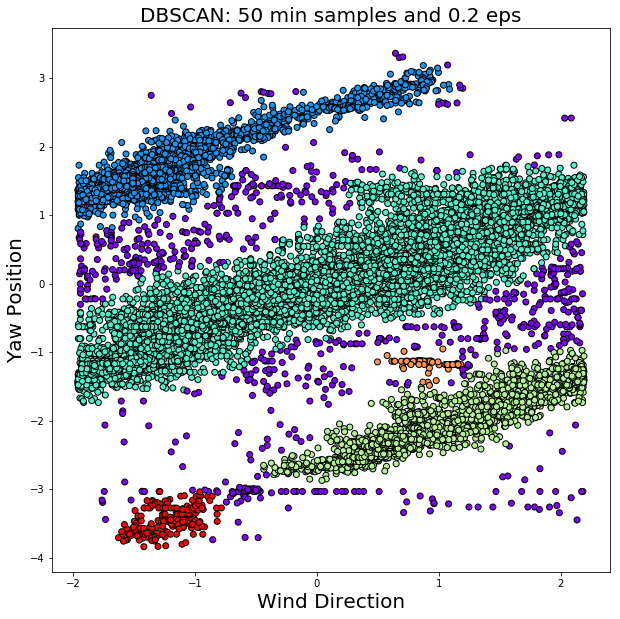

Estimated number of clusters: 5
Silhouette Score = 0.363040343658


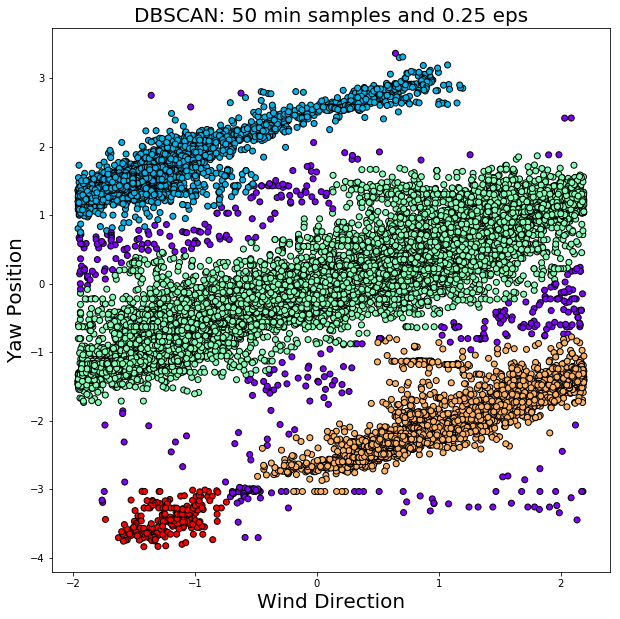

Estimated number of clusters: 4
Silhouette Score = 0.520010938276


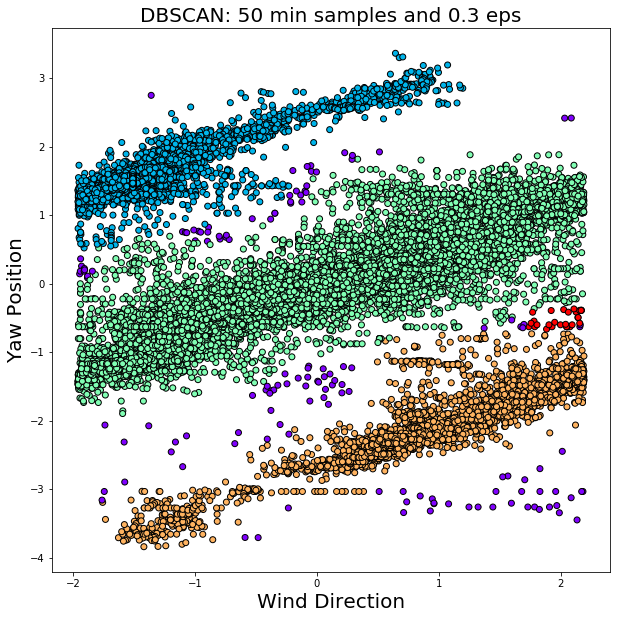

Estimated number of clusters: 4
Silhouette Score = 0.40100450533


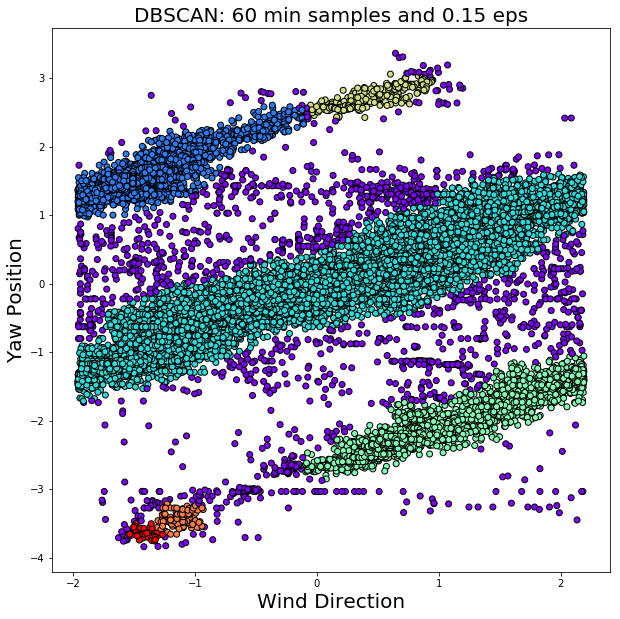

Estimated number of clusters: 6
Silhouette Score = 0.465913955307


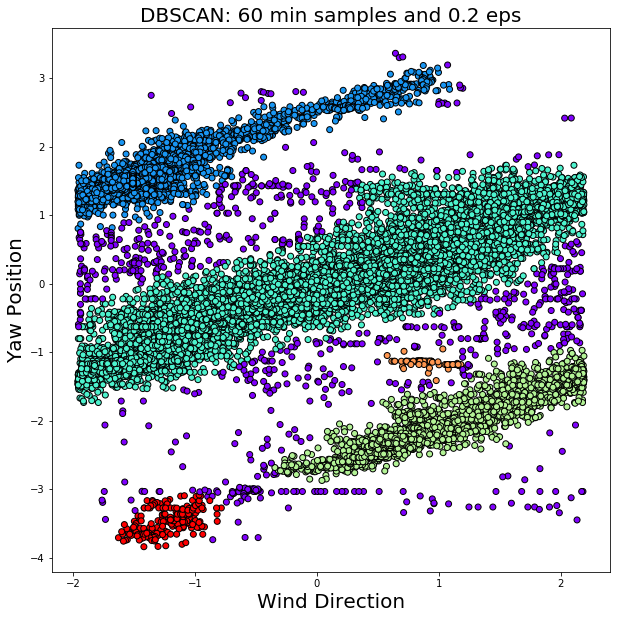

Estimated number of clusters: 5
Silhouette Score = 0.338248569909


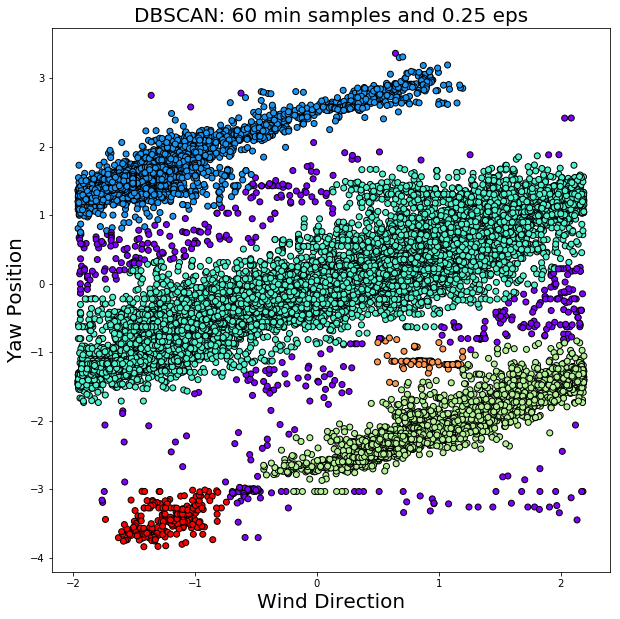

Estimated number of clusters: 5
Silhouette Score = 0.349719920133


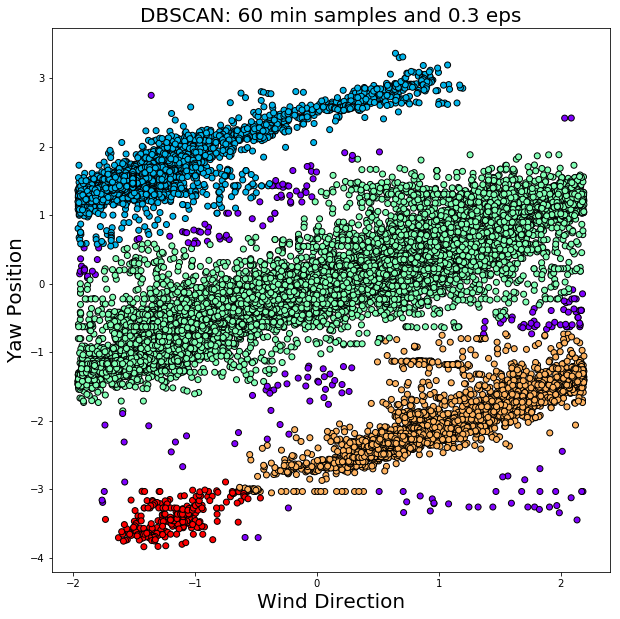

Estimated number of clusters: 4
Silhouette Score = 0.516389298967


In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)

score_list = []
cluster_list = []
test_list = []

min_samples_range = range(30,70,10)
eps_range = np.arange(0.15,0.35,0.05)

for x in min_samples_range:
    for y in eps_range:
        min_samples = x
        eps = y

        model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(X)
        
        plt.figure(figsize=(10,10))
        plt.scatter(X[:,1], X[:,0], c=model.labels_, cmap=plt.cm.rainbow,edgecolors='k')
        plt.ylabel("Yaw Position", fontsize=20)
        plt.xlabel("Wind Direction", fontsize=20)
        plt.title("DBSCAN: %s min samples and %s eps" %(min_samples, eps), fontsize=20)
        plt.show()

        
        n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
        cluster_list.append(n_clusters_)
        print('Estimated number of clusters: %d' % n_clusters_)
                
        score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=5000)
        score_list.append(score)
        print("Silhouette Score = %s" %(score))

After visual inspection of the color coded clusters, I believe the best tuned parameters are: Min Samples 50 & Epsilon 0.3. This model is shown below. The model captures the top two clusters very well. The red cluster could be considered noise and the lower cluster could be considered as two separate clusters but overall the model is good. It is clear to see how the two parameters determine the number of clusters and also now many outliers are identified. A model of 40 minimum samples and 0.25 epsilon gives a very good model but the same model with 0.3 epsilon does not. 


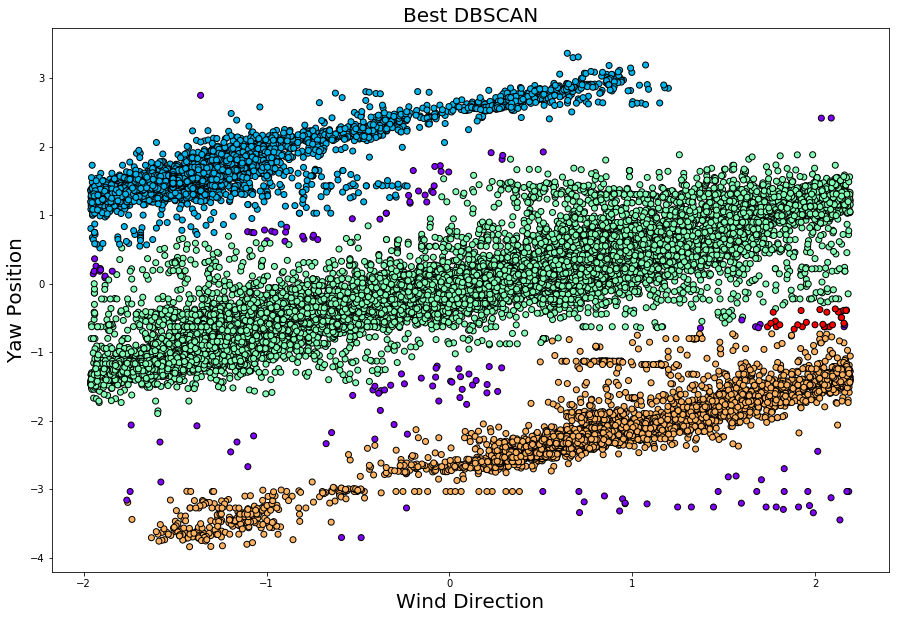

In [24]:
model = DBSCAN(eps=0.3, min_samples=50, n_jobs=-1).fit(X)
        
plt.figure(figsize=(15,10))
plt.scatter(X[:,1], X[:,0], c=model.labels_, cmap=plt.cm.rainbow,edgecolors='k')
plt.ylabel("Yaw Position", fontsize=20)
plt.xlabel("Wind Direction", fontsize=20)
plt.title("Best DBSCAN", fontsize=20)
plt.show()

I do not believe the silhouette metric is the best way to evaluate clustering on this dataset. Skewed results are due to the non-convex nature of the clusters. Below is a graph of how the silhouette score changes with the number of clusters. As you can see, four clusters give the best results. 

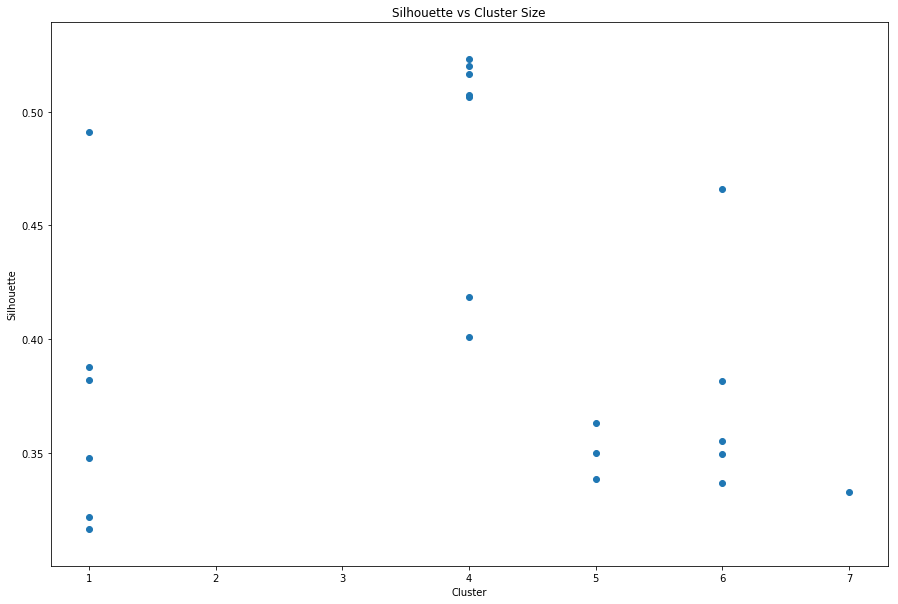

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(x=cluster_list,y=score_list)
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
# plt.legend()
plt.show()

## Deployment (10 points total)
• Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

• How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?

• How would your deploy your model for interested parties?

• What other data should be collected?

• How often would the model need to be updated, etc.?

The main use for clustering for this dataset would be for outlier detection. DBSCAN is a great way to identify points that do not connect to the larger population. Toward this aim, we did achieve our goal. Pattern Energy would find this outlier detection method very useful in production. These outliers can be removed to improve other calculations. The model could be deployed in batches as new data is generated. Points with a cluster label of negative one can be flagged for review or removal. No further data is needed. The model may need to be reviewed one a quarter as the environmental conditions for each season change. 

## Exceptional Work (10 points total)
• You have free reign to provide additional analyses or combine analyses.

Plotting the data in polar coordinates helps to illustrate the true nature of the data set. The error between wind direction and yaw position could be caused by a malfunction in the yaw system or a sensor calibration issue. 

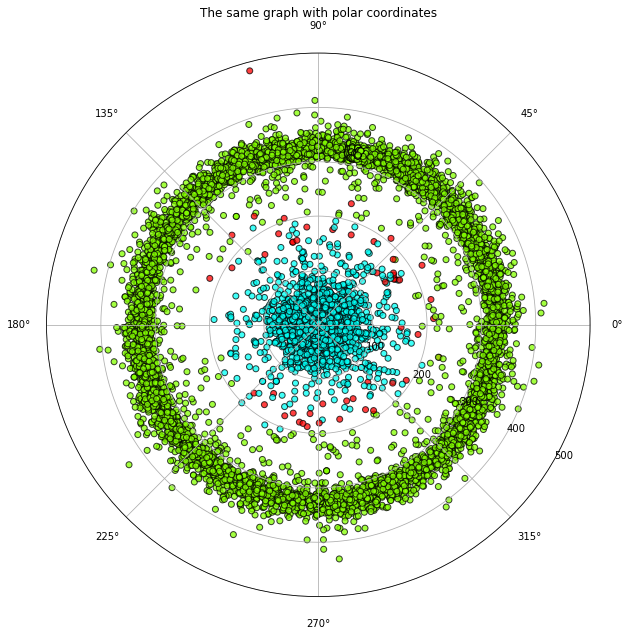

In [28]:
"""
Exceptional Work 
"""
import numpy as np
import matplotlib.pyplot as plt


r = df['wtc_ScYawPos_mean'] - df['WindDir_D1_WVT']
theta = df['WindDir_D1_WVT']
colors = model.labels_

plt.figure(figsize=(10,10))
ax = plt.subplot(projection='polar')

ax.scatter(theta, r, alpha=0.75, edgecolors='k', c=colors, cmap='hsv')

ax.set_rmax(500)
# ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-30)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("The same graph with polar coordinates", va='bottom')

plt.show()